# **Model of integrated transports for senior citizens**

##**Goal:**
To understand the senior citizens' mobility patterns and their characteristics: We aim to
provide better conditions of mobility for our senior citizens, giving them the same
opportunities to arrive at their points of interest with affordable and accessible public
transport.

## **Outcome:**
A general model to design an integrated transportation service for the senior population,
or, an integrated transportation service for senior population proposal for one city.

##**Development**

### Importing libraries and data

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [270]:
bus_routes = pd.read_csv('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-1/main/Challenge-2/BusRoutes.txt',delimiter = '|', encoding='unicode_escape')
tim = pd.read_csv('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-1/main/Challenge-2/Senior_TIM_v1.txt', delimiter= '|', encoding='unicode_escape')

In [271]:
bus_routes.sample(5)

,IDRoute,linkid
17108,61,996131534
30503,110,736509335
3756,12,773325846
36418,130,1163153712
16187,58,542419862


In [272]:
tim.sample(5)

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
51590,722361500,R1 - AM Lisboa,Lisboa,Lisboa,492.247018
102352,1121017728,R1 - AM Lisboa,Setúbal,Barreiro,388.671792
63249,820860612,R1 - AM Lisboa,Lisboa,Oeiras,7220.843408
3456,537270736,R1 - AM Lisboa,Lisboa,Lisboa,4862.672240
6216,537276681,R1 - AM Lisboa,Lisboa,Sintra,1088.281016


### Performing EDA

EDA on bus_routes

In [273]:
bus_routes.shape

(48312, 2)

In [274]:
bus_routes.isna().sum()

IDRoute    0
linkid     0
dtype: int64

In [275]:
bus_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48312 entries, 0 to 48311
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   IDRoute  48312 non-null  int64
 1   linkid   48312 non-null  int64
dtypes: int64(2)
memory usage: 755.0 KB


In [276]:
bus_routes.describe()

,IDRoute,linkid
count,48312.000000,4.831200e+04
mean,85.868004,8.499212e+08
std,47.541467,2.610475e+08
min,1.000000,8.021680e+07
25%,46.000000,5.751449e+08
50%,85.000000,8.514187e+08
75%,130.000000,1.160021e+09
max,166.000000,1.252616e+09


In [277]:
len(set(bus_routes['IDRoute']))

166

In [278]:
len(set(bus_routes['linkid']))

19277

In [279]:
grouped_by_route_id = bus_routes.groupby('IDRoute')
df = pd.DataFrame(grouped_by_route_id)
df

,0,1
0,1,IDRoute linkid 0 1 53727730...
1,2,IDRoute linkid 91 2 537277...
2,3,IDRoute linkid 353 3 537279...
3,4,IDRoute linkid 537 4 80218...
4,5,IDRoute linkid 838 5 802...
...,...,...
161,162,IDRoute linkid 47453 162 53...
162,163,IDRoute linkid 47871 163 54...
163,164,IDRoute linkid 47985 164 54...
164,165,IDRoute linkid 48052 165 54...


In [280]:
bus_route_with_id = {i:[] for i in range(1, 167)}


In [281]:
bus_routes.groupby('IDRoute').count()

,linkid
IDRoute,
1,91
2,262
3,184
4,301
5,494
...,...
162,418
163,114
164,67


In [282]:
#list(bus_routes.loc[bus_routes['IDRoute']==1]['linkid'])

In [283]:
merged_df = pd.merge(bus_routes, tim, how = 'inner', on =['linkid'])
merged_df.sample(5)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
5461,3,1222969112,R1 - AM Lisboa,Lisboa,Lisboa,1090.185866
30892,84,1221417423,R1 - AM Lisboa,Lisboa,Oeiras,88.905485
53025,114,810311529,R1 - AM Lisboa,Lisboa,Oeiras,29.598113
53699,133,576717119,R2 - AM Porto,Porto,Porto,227.715247
45539,106,835606010,R1 - AM Lisboa,Lisboa,Oeiras,88.905485


### EDA on merged dataframe

In [284]:
merged_df.shape

(60181, 6)

In [285]:
merged_df.columns

Index(['IDRoute', 'linkid', 'Region_of_Origin', 'District_of_Origin',
       'County_of_Origin', 'Average_Daily_SeniorPopulation_Travelling'],
      dtype='object')

In [286]:
merged_df.isna().sum()

IDRoute                                      0
linkid                                       0
Region_of_Origin                             0
District_of_Origin                           0
County_of_Origin                             0
Average_Daily_SeniorPopulation_Travelling    0
dtype: int64

In [287]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60181 entries, 0 to 60180
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   IDRoute                                    60181 non-null  int64  
 1   linkid                                     60181 non-null  int64  
 2   Region_of_Origin                           60181 non-null  object 
 3   District_of_Origin                         60181 non-null  object 
 4   County_of_Origin                           60181 non-null  object 
 5   Average_Daily_SeniorPopulation_Travelling  60181 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [289]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60181 entries, 0 to 60180
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   IDRoute                                    60181 non-null  int64  
 1   linkid                                     60181 non-null  int64  
 2   Region_of_Origin                           60181 non-null  object 
 3   District_of_Origin                         60181 non-null  object 
 4   County_of_Origin                           60181 non-null  object 
 5   Average_Daily_SeniorPopulation_Travelling  60181 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [290]:
merged_df.describe()

,IDRoute,linkid,Average_Daily_SeniorPopulation_Travelling
count,60181.000000,6.018100e+04,60181.000000
mean,67.964756,8.284400e+08,1028.561153
std,43.845876,2.567768e+08,2184.997299
min,1.000000,8.021681e+07,21.704987
25%,35.000000,5.453637e+08,136.035127
50%,63.000000,8.329430e+08,326.484305
75%,99.000000,9.906503e+08,833.829727
max,166.000000,1.223275e+09,28955.439208


### Analyzing each column

In [291]:
merged_df.columns

Index(['IDRoute', 'linkid', 'Region_of_Origin', 'District_of_Origin',
       'County_of_Origin', 'Average_Daily_SeniorPopulation_Travelling'],
      dtype='object')

#### IDRoute

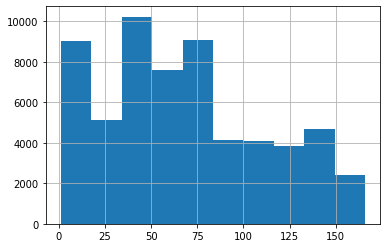

In [292]:
merged_df['IDRoute'].hist()

####linkid

In [293]:
len(set(merged_df['linkid']))

9327

####Region_of_origin

In [294]:
set(merged_df['Region_of_Origin'])

{'R1 - AM Lisboa', 'R2 - AM Porto'}

In [295]:
n = merged_df.shape[0]
print('R1 - AM Lisboa ',len(merged_df[merged_df['Region_of_Origin']=='R1 - AM Lisboa'])/n*100)
print('R2 - AM Porto ',len(merged_df[merged_df['Region_of_Origin']=='R2 - AM Porto'])/n*100)

R1 - AM Lisboa  75.70495671391303
R2 - AM Porto  24.29504328608697


####District of origin

In [296]:
set(merged_df['District_of_Origin'])

{'Aveiro', 'Lisboa', 'Porto', 'Setúbal'}

In [297]:
n = merged_df.shape[0]
print('Aveiro ',len(merged_df[merged_df['District_of_Origin']=='Aveiro'])/n*100)
print('Lisboa ',len(merged_df[merged_df['District_of_Origin']=='Lisboa'])/n*100)
print('Porto ',len(merged_df[merged_df['District_of_Origin']=='Porto'])/n*100)
print('Setúbal ',len(merged_df[merged_df['District_of_Origin']=='Setúbal'])/n*100)



Aveiro  0.17779697911300907
Lisboa  60.979378873730916
Porto  24.11724630697396
Setúbal  14.725577840182117


####county of origin

In [298]:
c= set(merged_df['County_of_Origin'])
print(c, len(c))

{'Amadora', 'Vila Franca de Xira', 'Gondomar', 'Lisboa', 'Odivelas', 'Setúbal', 'Palmela', 'Santa Maria da Feira', 'Alcochete', 'Sesimbra', 'Oeiras', 'Porto', 'Maia', 'Cascais', 'Matosinhos', 'Sintra', 'Barreiro', 'Montijo', 'Almada', 'Loures', 'Mafra', 'Seixal'} 22


In [299]:
import plotly.express as px
fig = px.histogram(merged_df, x= 'County_of_Origin')
fig.show()

#### Average_Daily_SeniorPopulation_Travelling



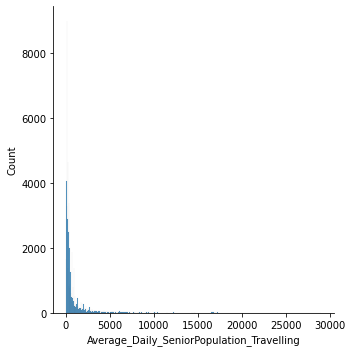

In [300]:
import seaborn as sns

#sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.displot(merged_df['Average_Daily_SeniorPopulation_Travelling']).set(xlabel='Average_Daily_SeniorPopulation_Travelling', ylabel='Count');

In [301]:
#sns.boxplot(x='Region_of_Origin', y='Average_Daily_SeniorPopulation_Travelling', data=merged_df)

###Encoding the categorical data

In [302]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
merged_df['Region_of_Origin'] = number.fit_transform(merged_df['Region_of_Origin'].astype('str'))
merged_df['County_of_Origin'] = number.fit_transform(merged_df['County_of_Origin'].astype('str'))
merged_df['District_of_Origin'] = number.fit_transform(merged_df['District_of_Origin'].astype('str'))

In [303]:
merged_df.sample(4)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
18748,43,799348401,0,3,11,231.154260
24462,30,815776606,0,1,21,77.051420
55725,136,867473663,1,2,15,227.715247
19128,16,864012700,0,1,6,453.450424


###Finding Correlation 

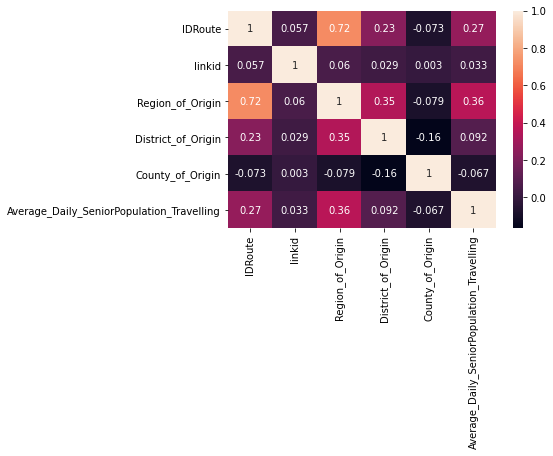

In [304]:
corrr = merged_df.corr()
sns.heatmap(corrr, annot = True)

###Developing a model

In [308]:
merged_df = merged_df.drop(columns= ['County_of_Origin'])

In [320]:
X = merged_df.drop(columns= ['Average_Daily_SeniorPopulation_Travelling'])
y = merged_df['Average_Daily_SeniorPopulation_Travelling']

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [311]:
from sklearn.metrics import mean_squared_error, r2_score

**Linear Regression**

In [321]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(X, y)

y_pred = lin.predict(X)
print('Coefficients:', lin.coef_)
print('Intercept:', lin.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, y_pred))

Coefficients: [ 7.35489197e-01  9.71604776e-08  1.86847910e+03 -1.13067242e+02]
Intercept: 617.5688997102607
Mean squared error (MSE): 4131320.28
Coefficient of determination (R^2): 0.13


**Polynomial Regression** [link for pr](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

**Principal Component regression**
[link text](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py)

**Partial Least Squares Regression**

**[Check THis](https://www.kaggle.com/ankitjha/comparing-regression-models)**

###Taking input from user

In [326]:
#@title User Input
user_input_idroute =  1#@param {type:"integer"}
user_input_linkid =  1#@param {type:"integer"}
user_input_region_of_origin = "R1 - AM Lisboa" #@param ["R1 - AM Lisboa", "R2 - AM Porto"]
user_input_district_of_origin = 'Aveiro' #@param ['Aveiro', 'Lisboa', 'Porto', 'Setúbal']
user_input_county_of_origin = 'Amadora' #@param ['Amadora', 'Vila Franca de Xira', 'Gondomar', 'Lisboa', 'Odivelas', 'Setúbal', 'Palmela', 'Santa Maria da Feira', 'Alcochete', 'Sesimbra', 'Oeiras', 'Porto', 'Maia', 'Cascais', 'Matosinhos', 'Sintra', 'Barreiro', 'Montijo', 'Almada', 'Loures', 'Mafra', 'Seixal']


In [327]:
user_input = {'IDRoute': [user_input_idroute], 'linkid': [user_input_linkid] , 'Region_of_Origin': [user_input_region_of_origin], 'District_of_Origin': [user_input_district_of_origin],
       'County_of_Origin': [user_input_county_of_origin]}

Performing all the preprocessing done on dataframe here: Encoding, dropping columns

Using the model with highest accuracy to predict the value

If the Average_Daily_SeniorPopulation_Travelling is known for given user input we can add the data to merged dataframe

In [324]:
#@title Is the output "Average_Daily_SeniorPopulation_Travelling" known for given input
user_input_target =  'Yes' #@param ['Yes','No']

In [325]:
if user_input_target == 'Yes':
  #@title "Average_Daily_SeniorPopulation_Travelling" known for given input
  user_input_target =  0 #@param {type:"string"}
  user_input_target = float(user_input_target)
  user_input['Average_Daily_SeniorPopulation_Travelling'] = user_input_target
  merged_df.append(user_input, ignore_index=True)

#**Pattern Recognition????**